In [1]:
import pandas as pd
df = pd.read_csv('../data/processed/cleaned_data.csv')

# Quick look
df.head()

,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,trans_hour,trans_day,trans_weekday,trans_month,age
0,fraud_Kirlin and Sons,personal_care,2.86,M,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,33.986391,-81.200714,0,12,21,6,6,57
1,fraud_Sporer-Keebler,personal_care,29.84,F,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",39.450498,-109.960431,0,12,21,6,6,35
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",40.495810,-74.196111,0,12,21,6,6,55
3,fraud_Haley Group,misc_pos,60.05,M,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,28.812398,-80.883061,0,12,21,6,6,38
4,fraud_Johnston-Casper,travel,3.19,M,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,44.959148,-85.884734,0,12,21,6,6,70


In [2]:
target = 'is_fraud'

In [3]:
df['is_fraud'].value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

In [4]:
df['is_fraud'].value_counts(normalize=True) * 100

is_fraud
0    99.614014
1     0.385986
Name: proportion, dtype: float64

In [5]:
num_cols = ['amt', 'age', 'city_pop', 'lat', 'long', 'merch_lat', 'merch_long']
df[num_cols].describe()

,amt,age,city_pop,lat,long,merch_lat,merch_long
count,555719.000000,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000
mean,69.392810,51.686271,8.822189e+04,38.543253,-90.231325,38.542798,-90.231380
std,156.745941,17.436775,3.003909e+05,5.061336,13.721780,5.095829,13.733071
min,1.000000,20.000000,2.300000e+01,20.027100,-165.672300,19.027422,-166.671575
25%,9.630000,38.000000,7.410000e+02,34.668900,-96.798000,34.755302,-96.905129
50%,47.290000,50.000000,2.408000e+03,39.371600,-87.476900,39.376593,-87.445204
75%,83.010000,63.000000,1.968500e+04,41.894800,-80.175200,41.954163,-80.264637
max,22768.110000,101.000000,2.906700e+06,65.689900,-67.950300,66.679297,-66.952026


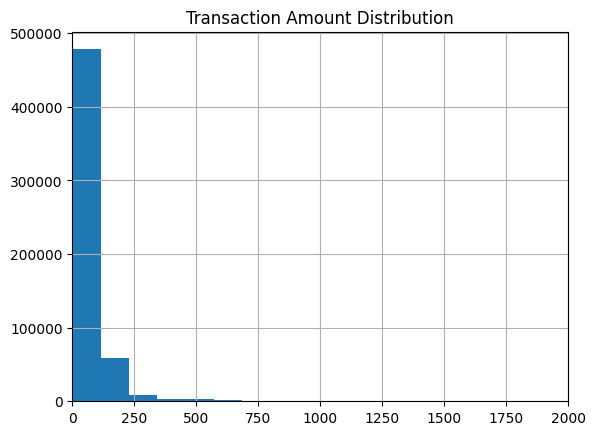

In [6]:
import matplotlib.pyplot as plt

df['amt'].hist(bins=200)
plt.xlim(0, 2000)
plt.title("Transaction Amount Distribution")
plt.show()


In [7]:
df.groupby('is_fraud')['amt'].describe()

,count,mean,std,min,25%,50%,75%,max
is_fraud,,,,,,,,
0,553574.0,67.614408,152.471931,1.00,9.60,47.15,82.62,22768.11
1,2145.0,528.356494,392.747594,1.78,214.51,371.94,907.77,1320.92


In [9]:
#we can see that the average amount of fraud transaction is higher and similar in variance

In [10]:
df.groupby('trans_hour')['is_fraud'].mean()

trans_hour
0     0.010356
1     0.009154
2     0.009261
3     0.010660
4     0.000830
5     0.001116
6     0.000773
7     0.000884
8     0.000556
9     0.000776
10    0.000665
11    0.000940
12    0.000606
13    0.000497
14    0.000496
15    0.000749
16    0.000735
17    0.000570
18    0.001071
19    0.000859
20    0.001286
21    0.000957
22    0.019374
23    0.018682
Name: is_fraud, dtype: float64

In [11]:
#we can see in hours 0,1,2,3,4,18,20,22,23 fraud rate is higher

In [12]:
df.groupby('trans_weekday')['is_fraud'].mean()

trans_weekday
0    0.002623
1    0.003006
2    0.005034
3    0.005197
4    0.004729
5    0.004272
6    0.004017
Name: is_fraud, dtype: float64

In [15]:
#we can see monday and tuesday fraud is lower than other days

In [16]:
df.groupby('trans_month')['is_fraud'].mean()

trans_month
6     0.004425
7     0.003739
8     0.004676
9     0.004890
10    0.005537
11    0.004048
12    0.001849
Name: is_fraud, dtype: float64

In [17]:
#we can see october has the highest fraud rate and december has the lowest